In [1]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [2]:
from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [3]:
model = Classifier()

images, lables = next(iter(testloader))

ps = torch.exp(model(images))

print(ps.shape)

torch.Size([64, 10])


In [5]:
top_p, top_class = ps.topk(1, dim=1)
print(top_class[:10,:])

tensor([[4],
        [1],
        [4],
        [4],
        [4],
        [4],
        [4],
        [8],
        [4],
        [4]])


In [7]:
equals = top_class == lables.view(*top_class.shape)

In [10]:
accuracy = torch.mean(equals.type(torch.FloatTensor))

In [11]:
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 6.25%


In [13]:
model = Classifier()
criterion = nn.NLLLoss(reduction = 'sum')
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30

train_losses, test_losses = [], []
for e in range(epochs):
    tot_train_loss = 0
    for images, lables in trainloader:
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps,lables)
        tot_train_loss += loss.item()
        
        loss.backward()
        optimizer.step()
    else:
        tot_test_loss = 0
        test_correct = 0
        
        with torch.no_grad():
            for images, lables in testloader:
                log_ps = model(images)
                loss = criterion(log_ps, lables)
                tot_test_loss += loss.item()
                
                ps = torch.exp(model(images))
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == lables.view(*top_class.shape)
                test_correct += equals.sum().item()
            
            train_loss = tot_train_loss/len(trainloader.dataset)
            test_loss = tot_test_loss/len(testloader.dataset)
            
            # At completion of epoch
            train_losses.append(train_loss)
            test_losses.append(test_loss)
            
            print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_loss),
              "Test Loss: {:.3f}.. ".format(test_loss),
              "Test Accuracy: {:.3f}".format(test_correct / len(testloader.dataset)))
        
    

Epoch: 1/30..  Training Loss: 0.511..  Test Loss: 0.506..  Test Accuracy: 0.815
Epoch: 2/30..  Training Loss: 0.386..  Test Loss: 0.421..  Test Accuracy: 0.849
Epoch: 3/30..  Training Loss: 0.349..  Test Loss: 0.396..  Test Accuracy: 0.863
Epoch: 4/30..  Training Loss: 0.330..  Test Loss: 0.368..  Test Accuracy: 0.867
Epoch: 5/30..  Training Loss: 0.312..  Test Loss: 0.372..  Test Accuracy: 0.874
Epoch: 6/30..  Training Loss: 0.299..  Test Loss: 0.390..  Test Accuracy: 0.867
Epoch: 7/30..  Training Loss: 0.287..  Test Loss: 0.361..  Test Accuracy: 0.876
Epoch: 8/30..  Training Loss: 0.279..  Test Loss: 0.401..  Test Accuracy: 0.860
Epoch: 9/30..  Training Loss: 0.273..  Test Loss: 0.351..  Test Accuracy: 0.878
Epoch: 10/30..  Training Loss: 0.261..  Test Loss: 0.359..  Test Accuracy: 0.880
Epoch: 11/30..  Training Loss: 0.257..  Test Loss: 0.364..  Test Accuracy: 0.879
Epoch: 12/30..  Training Loss: 0.253..  Test Loss: 0.361..  Test Accuracy: 0.884
Epoch: 13/30..  Training Loss: 0.247.

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

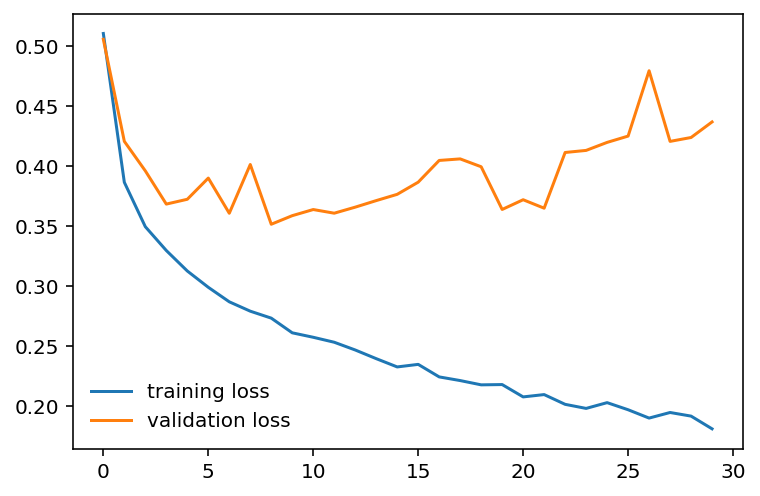

In [15]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label ='validation loss')
plt.legend(frameon = False)

In [20]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output so no dropout here
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [21]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 30
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.600..  Test Loss: 0.482..  Test Accuracy: 0.831
Epoch: 2/30..  Training Loss: 0.479..  Test Loss: 0.441..  Test Accuracy: 0.844
Epoch: 3/30..  Training Loss: 0.451..  Test Loss: 0.430..  Test Accuracy: 0.846
Epoch: 4/30..  Training Loss: 0.434..  Test Loss: 0.430..  Test Accuracy: 0.852
Epoch: 5/30..  Training Loss: 0.423..  Test Loss: 0.397..  Test Accuracy: 0.857
Epoch: 6/30..  Training Loss: 0.414..  Test Loss: 0.397..  Test Accuracy: 0.861
Epoch: 7/30..  Training Loss: 0.404..  Test Loss: 0.414..  Test Accuracy: 0.849
Epoch: 8/30..  Training Loss: 0.401..  Test Loss: 0.409..  Test Accuracy: 0.853
Epoch: 9/30..  Training Loss: 0.396..  Test Loss: 0.382..  Test Accuracy: 0.863
Epoch: 10/30..  Training Loss: 0.389..  Test Loss: 0.389..  Test Accuracy: 0.865
Epoch: 11/30..  Training Loss: 0.388..  Test Loss: 0.403..  Test Accuracy: 0.863
Epoch: 12/30..  Training Loss: 0.385..  Test Loss: 0.381..  Test Accuracy: 0.868
Epoch: 13/30..  Training Loss: 0.381.

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

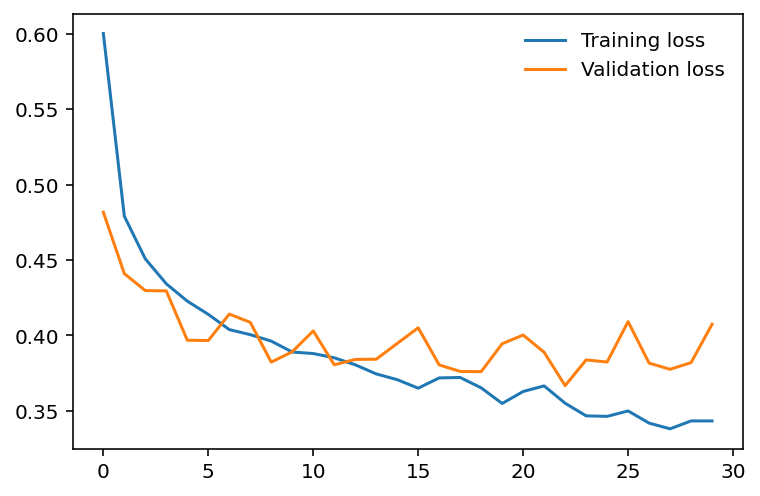

In [23]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

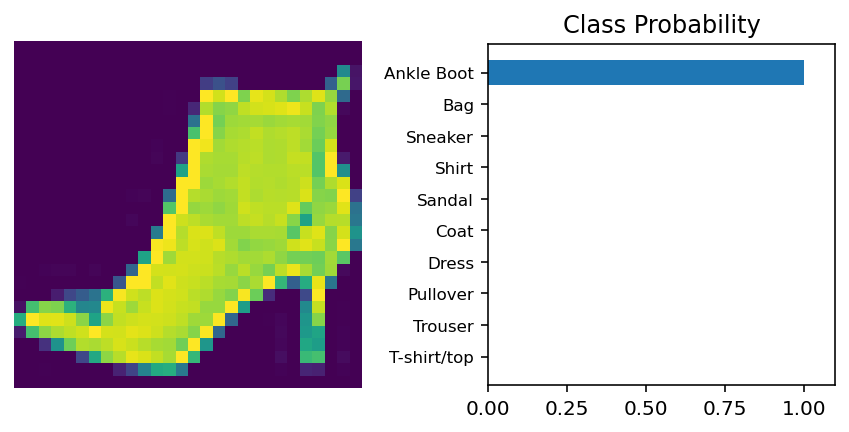

In [28]:
import helper
model.eval()
dataiter = iter(testloader)
images,lables = next(dataiter)
img = images[0]
img = img.view(1,784)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)

helper.view_classify(img.view(1,28,28), ps, version = 'Fashion')